In [81]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import re
import pickle

In [4]:
df=pd.read_csv('dataset_extract.csv')
df=df.iloc[:, 1:]
df.head()

Title       Genre  Favorite count  \
0            [capoeira + flow] mighty omega    Fighting           30742   
1  [2x logia update 3.5] grand piece online   Adventure          309465   
2                                  vesteria   Adventure          358269   
3                           [2x exp] shindo  All Genres         1535708   
4  [updated peace treaties] rise of nations    Military          199107   

   Maximum Visits  Total Visitors  likes count  dislikes count  \
0              35         2788642         7874             859   
1               1        53742605       173526            9028   
2              10        23670840       112076           10878   
3               5       834922089       979471           60486   
4              50        39009742        74469           11636   

                                         Description Date Created  \
0  Sequel to our previous game on Tokita_Ohma acc...     4/9/2020   
1  PC ONLY\nLong awaited naval adventure experien...     5/6/2018   
2  Explore breathtaking worlds, fight powerful mo...    9/18/2018   
3  056 UPDATE:\nhttps://www.youtube.com/watch?v=I...    1/20/2020   
4  Grand Strategy game focused on world dominatio...   11/14/2018   

  Date Updated  ...  GC - People Love  Current Date  Age of Game  \
0    5/25/2021  ...                 0    2021-05-27          413   
1    5/25/2021  ...                 1    2021-05-27         1117   
2    5/25/2021  ...                 0    2021-05-27          982   
3    5/23/2021  ...                 1    2021-05-27          493   
4    5/18/2021  ...                 0    2021-05-27          925   

   Visitors Per Day Likes Per Day  Dislikes Per Day  Ratings Per Day  \
0      6.752160e+03     19.065375          2.079903        21.145278   
1      4.811334e+04    155.350045          8.082363       163.432408   
2      2.410473e+04    114.130346         11.077393       125.207739   
3      1.693554e+06   1986.756592        122.689655      2109.446247   
4      4.217269e+04     80.507027         12.579459        93.086486   

   Favorites Per Day  Title length  Desc length  
0          74.435835            30          590  
1         277.050134            40          481  
2         364.836049             8          293  
3        3115.026369            15          380  
4         215.250811            40          593  

[5 rows x 23 columns]

In [150]:
df.columns

Index(['Title', 'Genre', 'Favorite count', 'Maximum Visits', 'Total Visitors',
       'likes count', 'dislikes count', 'Description', 'Date Created',
       'Date Updated', 'GC - Most Engaging', 'GC - Up-and-Coming',
       'GC - Popular', 'GC - People Love', 'Current Date', 'Age of Game',
       'Visitors Per Day', 'Likes Per Day', 'Dislikes Per Day',
       'Ratings Per Day', 'Favorites Per Day', 'Title length', 'Desc length',
       'Title Words', 'Desc Words', 'GC Awards Count', 'Title+Description'],
      dtype='object')

In [5]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r' ',text)

In [6]:
#To remove [] from title
#Creates additional lists for title length and description length (word count)

titles = []
desc=[]
desc_length=[]
title_length=[]

game_limit = len(df)
for idx , row in df[:game_limit].iterrows():
    t = (row['Title']).replace('[','')
    t = t.replace(']', '')
    d=deEmojify(row['Description'])
    desc.append(d)
    titles.append(t)
    dl=len(row['Description'].split(' '))
    desc_length.append(dl)
    tl=len(row['Title'].split(' '))
    title_length.append(tl)
    

In [7]:
#Create new columns from lists in loop
df['Title']=titles
df['Description']=desc
df['Title Words']=title_length
df['Desc Words']=desc_length

In [8]:
df.head()

Title       Genre  Favorite count  \
0            capoeira + flow mighty omega    Fighting           30742   
1  2x logia update 3.5 grand piece online   Adventure          309465   
2                                vesteria   Adventure          358269   
3                           2x exp shindo  All Genres         1535708   
4  updated peace treaties rise of nations    Military          199107   

   Maximum Visits  Total Visitors  likes count  dislikes count  \
0              35         2788642         7874             859   
1               1        53742605       173526            9028   
2              10        23670840       112076           10878   
3               5       834922089       979471           60486   
4              50        39009742        74469           11636   

                                         Description Date Created  \
0  Sequel to our previous game on Tokita_Ohma acc...     4/9/2020   
1  PC ONLY\nLong awaited naval adventure experien...     5/6/2018   
2  Explore breathtaking worlds, fight powerful mo...    9/18/2018   
3  056 UPDATE:\nhttps://www.youtube.com/watch?v=I...    1/20/2020   
4  Grand Strategy game focused on world dominatio...   11/14/2018   

  Date Updated  ...  Age of Game  Visitors Per Day  Likes Per Day  \
0    5/25/2021  ...          413      6.752160e+03      19.065375   
1    5/25/2021  ...         1117      4.811334e+04     155.350045   
2    5/25/2021  ...          982      2.410473e+04     114.130346   
3    5/23/2021  ...          493      1.693554e+06    1986.756592   
4    5/18/2021  ...          925      4.217269e+04      80.507027   

   Dislikes Per Day Ratings Per Day  Favorites Per Day  Title length  \
0          2.079903       21.145278          74.435835            30   
1          8.082363      163.432408         277.050134            40   
2         11.077393      125.207739         364.836049             8   
3        122.689655     2109.446247        3115.026369            15   
4         12.579459       93.086486         215.250811            40   

   Desc length  Title Words  Desc Words  
0          590            5          78  
1          481            7          63  
2          293            1          40  
3          380            3          24  
4          593            6          96  

[5 rows x 25 columns]

In [12]:
df.columns

Index(['Title', 'Genre', 'Favorite count', 'Maximum Visits', 'Total Visitors',
       'likes count', 'dislikes count', 'Description', 'Date Created',
       'Date Updated', 'GC - Most Engaging', 'GC - Up-and-Coming',
       'GC - Popular', 'GC - People Love', 'Current Date', 'Age of Game',
       'Visitors Per Day', 'Likes Per Day', 'Dislikes Per Day',
       'Ratings Per Day', 'Favorites Per Day', 'Title length', 'Desc length',
       'Title Words', 'Desc Words'],
      dtype='object')

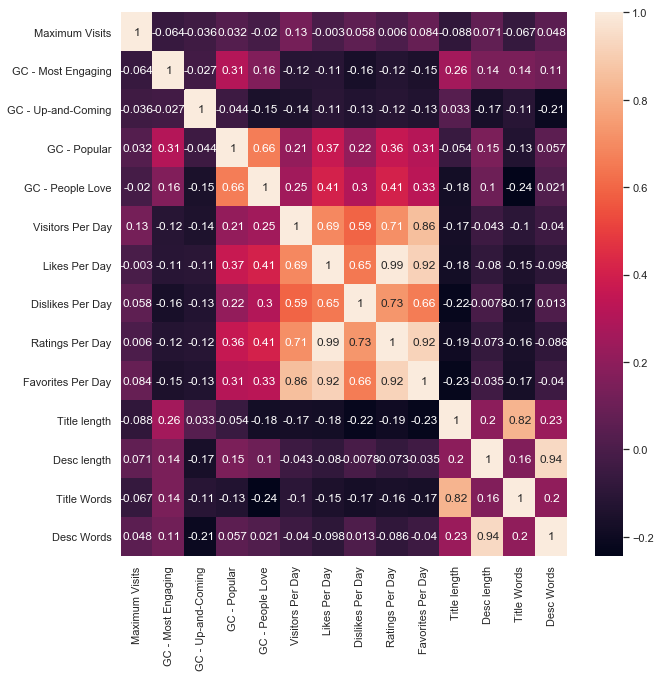

In [22]:
corr_df=df[['Maximum Visits', 'GC - Most Engaging', 'GC - Up-and-Coming',
            'GC - Popular', 'GC - People Love', 'Visitors Per Day', 'Likes Per Day', 'Dislikes Per Day',
            'Ratings Per Day', 'Favorites Per Day', 'Title length', 'Desc length',
            'Title Words', 'Desc Words']].corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr_df, annot=True)# , figsize=(10, 10))
plt.show()

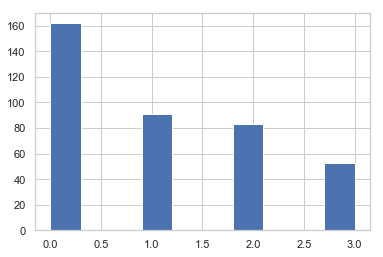

In [165]:
df['GC Awards Count']=df[['GC - Most Engaging', 'GC - Up-and-Coming', 'GC - Popular', 'GC - People Love']].sum(axis=1)
df['GC Awards Count'].hist()
plt.show()

/Users/kevinlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


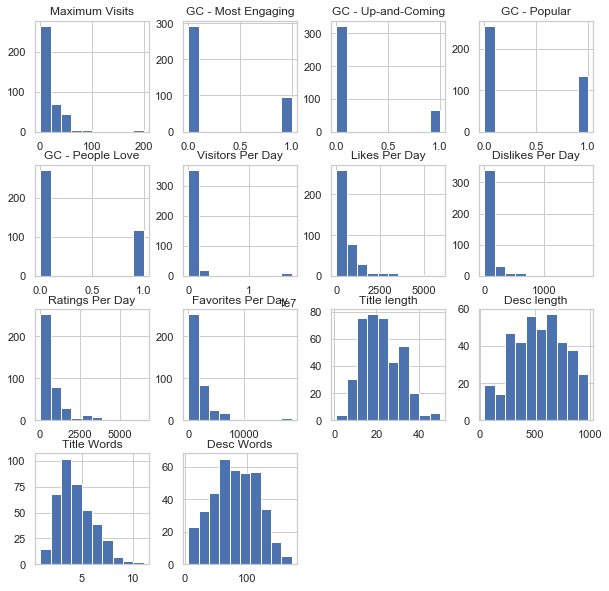

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
df[['Maximum Visits', 'GC - Most Engaging', 'GC - Up-and-Coming',
    'GC - Popular', 'GC - People Love', 'Visitors Per Day', 'Likes Per Day', 'Dislikes Per Day',
    'Ratings Per Day', 'Favorites Per Day', 'Title length', 'Desc length',
    'Title Words', 'Desc Words']].hist(ax=ax)
plt.show()

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tag import pos_tag
import pandas as pd

In [51]:
def data_cleaning(text_list): 
    stopwords_rem=False
    stopwords_en=stopwords.words('english')
    lemmatizer=WordNetLemmatizer()
    tokenizer=TweetTokenizer()
    reconstructed_list=[]
    for each_text in text_list: 
        lemmatized_tokens=[]
        tokens=tokenizer.tokenize(each_text.lower())
        pos_tags=pos_tag(tokens)
        for each_token, tag in pos_tags: 
            if tag.startswith('NN'): 
                pos='n'
            elif tag.startswith('VB'): 
                pos='v'
            else: 
                pos='a'
            lemmatized_token=lemmatizer.lemmatize(each_token, pos)
            if stopwords_rem: # False 
                if lemmatized_token not in stopwords_en: 
                    lemmatized_tokens.append(lemmatized_token)
            else: 
                lemmatized_tokens.append(lemmatized_token)
        reconstructed_list.append(' '.join(lemmatized_tokens))
    return reconstructed_list

In [181]:
df[df['GC Awards Count']==3][['Title', 'Description', 'Maximum Visits']]#.iloc[101, :].values

Title  \
1         2x logia update 3.5 grand piece online   
3                                  2x exp shindo   
10                           bee swarm simulator   
11             new update your bizarre adventure   
14                warrior cats: ultimate edition   
15   release + huge update stands awakening beta   
20                           welcome to bloxburg   
23              super luck  bubble gum simulator   
26                    bleach  anime battle arena   
35                         update 14 blox fruits   
45                       tower defense simulator   
61                              noob army tycoon   
72   release + huge update stands awakening beta   
73                                tank simulator   
82                warrior cats: ultimate edition   
86                           welcome to bloxburg   
87                                 2x exp shindo   
88             new update your bizarre adventure   
89                         update 14 blox fruits   
96        2x logia update 3.5 grand piece online   
98                              noob army tycoon   
101                      tower defense simulator   
105                          bee swarm simulator   
106  release + huge update stands awakening beta   
111                   bleach  anime battle arena   
119                               tank simulator   
122             super luck  bubble gum simulator   
123               warrior cats: ultimate edition   
145                          welcome to bloxburg   
148                        update 14 blox fruits   
150       2x logia update 3.5 grand piece online   
151                                2x exp shindo   
153                      tower defense simulator   
155            new update your bizarre adventure   
156                          bee swarm simulator   
173                               tank simulator   
175                             noob army tycoon   
176                   bleach  anime battle arena   
191             super luck  bubble gum simulator   
203               warrior cats: ultimate edition   
221                          welcome to bloxburg   
223            new update your bizarre adventure   
233                          bee swarm simulator   
256                        update 14 blox fruits   
277       2x logia update 3.5 grand piece online   
281                               tank simulator   
296                             noob army tycoon   
316                   bleach  anime battle arena   
351                             noob army tycoon   
361                               tank simulator   
365                          bee swarm simulator   
377                      tower defense simulator   
385             super luck  bubble gum simulator   

                                           Description  Maximum Visits  
1    PC ONLY\nLong awaited naval adventure experien...               1  
3    056 UPDATE:\nhttps://www.youtube.com/watch?v=I...               5  
10   Grow your own swarm of bees, collect pollen, a...               6  
11   ‚ú® „ÄéNEW UPDATE„Äè  ‚ú®\n‚û¢ New stand models, auras, ...              16  
14    MAY 15 UPDATE: Picking up kits, 3 new emotes ...              60  
15   JOIN THE GROUP:\nhttps://www.roblox.com/groups...              15  
20   Build and design your own amazing house, own c...              12  
23   Super Luck Event!\n-   2x Luck\n-   2x Mythic\...              10  
26   Check the second page of the roster to see JoJ...              12  
35     UPDATE 14 OUT NOW!  \nRumble Awakening + Isl...              12  
45   In this world, no one can survive alone. Team ...              50  
61         Attack the other noobs in this epic tycoon.               4  
72   JOIN THE GROUP:\nhttps://www.roblox.com/groups...              15  
73   Welcome to Tank Simulator! Fight in many diffe...              20  
82    MAY 15 UPDATE: Picking up kits, 3 new emotes ...              60  
86   Build and design your own amazing house, own c...  

In [53]:
df.columns

Index(['Title', 'Genre', 'Favorite count', 'Maximum Visits', 'Total Visitors',
       'likes count', 'dislikes count', 'Description', 'Date Created',
       'Date Updated', 'GC - Most Engaging', 'GC - Up-and-Coming',
       'GC - Popular', 'GC - People Love', 'Current Date', 'Age of Game',
       'Visitors Per Day', 'Likes Per Day', 'Dislikes Per Day',
       'Ratings Per Day', 'Favorites Per Day', 'Title length', 'Desc length',
       'Title Words', 'Desc Words', 'GC Awards Count'],
      dtype='object')

In [158]:
input_test_df

Title length  Desc length  Maximum Visits  000  001  007x  01  03  04  05  \
0              9          727              48    0    0     0   0   0   0   0   
1             12          511              14    0    0     0   0   0   0   0   
2             26          821              25    1    0     0   0   0   0   0   
3             14          363              32    0    0     0   0   0   0   0   
4              7          700              40    0    0     0   0   0   0   0   
..           ...          ...             ...  ...  ...   ...  ..  ..  ..  ..   
93            25          271              10    0    0     0   0   0   0   0   
94            19          614              30    0    0     0   0   0   0   0   
95            13          656              22    0    0     0   0   0   0   0   
96            29          591              16    0    0     0   0   0   0   0   
97            18          272              10    0    0     0   0   0   0   0   

    ...  zenkai  zero  zknx  zombie  zone  zonu  zoo  zoom  zushi  zynkururblx  
0   ...       0     0     0       0     0     0    0     0      0            0  
1   ...       0     0     0       0     0     0    0     0      0            0  
2   ...       0     0     0       0     0     0    0     0      0            0  
3   ...       0     0     0       0     0     0    0     0      0            0  
4   ...       0     0     0       0     0     0    0     0      0            0  
..  ...     ...   ...   ...     ...   ...   ...  ...   ...    ...          ...  
93  ...       0     0     0       0     0     0    0     0      0            0  
94  ...       0     0     0       0     0     0    0     0      0            0  
95  ...       0     0     0       0     0     0    0     0      0            0  
96  ...       0     0     0       0     0     0    0     0      0            0  
97  ...       0     0     0       0     0     0    0     0      0            0  

[98 rows x 3065 columns]

In [118]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

models={'vpd.sav': 'Visitors Per Day', 
        'lpd.sav': 'Likes Per Day', 
        'dpd.sav': 'Dislikes Per Day',
        'rpd.sav': 'Ratings Per Day', 
        'fpd.sav': 'Favorites Per Day'}

df['Title+Description']=df['Title']+df['Description']
X=df[['Title length', 'Desc length', 'Maximum Visits', 'Title+Description']]
targets=df[models.values()]
X_train, X_test, y_all_train, y_all_test=train_test_split(X, targets)

# tokens_list=data_cleaning(df['Title+Description'])
tokens_train_list=data_cleaning(X_train['Title+Description'])
X_train=X_train.drop(columns=['Title+Description']).reset_index(drop=True)
cvt=CountVectorizer()
cvt.fit(tokens_train_list)
tokens_train_ary=cvt.transform(tokens_train_list).toarray()
words_train_df=pd.DataFrame(tokens_train_ary, columns=cvt.get_feature_names())
input_train_df=pd.concat([X_train, words_train_df], axis=1)

tokens_test_list=data_cleaning(X_test['Title+Description'])
X_test=X_test.drop(columns=['Title+Description']).reset_index(drop=True)
tokens_test_ary=cvt.transform(tokens_test_list).toarray()
words_test_df=pd.DataFrame(tokens_test_ary, columns=cvt.get_feature_names())
input_test_df=pd.concat([X_test, words_test_df], axis=1)

for model_name, each_target in models.items(): 
    y_train=y_all_train[each_target]
    y_test=y_all_test[each_target]
    rfr=RandomForestRegressor()
    rfr.fit(input_train_df, y_train)
    print(f'=========={each_target}==========')
    print(f'RFR Train: {rfr.score(input_train_df, y_train)}')
    print(f'RFR Test: {rfr.score(input_test_df, y_test)}')
    
    pickle.dump(rfr, open(f'models/{model_name}', "wb"))

pickle.dump(cvt, open(f'models/text_vectorizer.sav', 'wb'))

==========Visitors Per Day==========
RFR Train: 0.9682810387969684
RFR Test: 0.9113162014387672
==========Likes Per Day==========
RFR Train: 0.9337993990293196
RFR Test: 0.708564089301887
==========Dislikes Per Day==========
RFR Train: 0.913008134758551
RFR Test: 0.7189580189401038
==========Ratings Per Day==========
RFR Train: 0.9336995337080701
RFR Test: 0.7156631418329481
==========Favorites Per Day==========
RFR Train: 0.9510956073689276
RFR Test: 0.8170499457262714


In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

X=df[['Visitors Per Day', 'Likes Per Day', 'Dislikes Per Day', 'Ratings Per Day', 'Favorites Per Day']]
y=df['GC Awards Count']
X_train, X_test, y_train, y_test=train_test_split(X, y)

lr=LinearRegression()
lr.fit(X_train, y_train)
print(f'LR Train: {lr.score(X_train, y_train)}')
print(f'LR Test: {lr.score(X_test, y_test)}')

rfr=RandomForestRegressor()
rfr.fit(X_train, y_train)
print(f'LR Train: {rfr.score(X_train, y_train)}')
print(f'LR Test: {rfr.score(X_test, y_test)}')

pickle.dump(rfr, open(f'models/gc_awards.sav', "wb"))

LR Train: 0.08003016945727448
LR Test: 0.10807086305712688
LR Train: 0.9659336529776283
LR Test: 0.8230414750957854


In [178]:
rfr.predict(X)[101]

2.96

In [184]:
df.iloc[101][['Title', 'Description', 'Maximum Visits']].values

array(['tower defense simulator',
       'In this world, no one can survive alone. Team up with friends to fend off countless waves of zombies, fight bosses, earn coins, level up, and buy new towers! If you\'re feeling up for a challenge, try taking on harder bosses on harder difficulties!\n\n  Join the group for +$100 starting cash! https://www.roblox.com/groups/4914494\n Thumbs up and favorite for more quality updates! \n\n UPDATES \n+ ü•∂ FROST INVASION EVENT\n+ ‚ùÑÔ∏è FROST SEASON\n+   SLEDGER TOWER\n+   FROST SKINS\n+   TOXIC GUNNER\n+   TOWER REWORKS\n+  Ô∏è BUG FIXES + CHANGES\n\nRead full update log: https://devforum.roblox.com/t/tower-defense-simulator-frost-invasion-update\n\n‚ú®Lead Dev/Design: BelowNatural\n Scripter: Razuatix\n Music Composer: Phoqus\n SFX Designer: BiddinUp\n Ô∏èGFX Designer: Jaaziar\n\n  8th Annual Bloxy Award Winner\nGoogle "TDS Wiki" for in-depth game info!',
       50], dtype=object)

In [9]:
df.columns

Index(['Title', 'Genre', 'Favorite count', 'Maximum Visits', 'Total Visitors',
       'likes count', 'dislikes count', 'Description', 'Date Created',
       'Date Updated', 'GC - Most Engaging', 'GC - Up-and-Coming',
       'GC - Popular', 'GC - People Love', 'Current Date', 'Age of Game',
       'Visitors Per Day', 'Likes Per Day', 'Dislikes Per Day',
       'Ratings Per Day', 'Favorites Per Day', 'Title length', 'Desc length',
       'Title Words', 'Desc Words'],
      dtype='object')